In [1]:
import tensorflow as tf

import os,glob
import cv2

2024-04-15 07:01:40.701706: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 07:01:40.701811: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 07:01:40.825221: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile

/tmp/ipykernel_34/3558392516.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [3]:
import os
import cv2
import random
import numpy as np

# Define the main directory containing subfolders of images
main_directory = '/kaggle/input/chestxray/train'

# Check if the main directory exists
if os.path.exists(main_directory):
    # List subdirectories within the main directory
    subfolders = [os.path.join(main_directory, d) for d in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, d))]

    classes = []
    count = 0
    images = []
    labels = []
    resultant = '/kaggle/input/chestxray/train'  # Define the directory to save processed images

    for folder in subfolders:
        items = os.listdir(folder)
        class_name = os.path.basename(folder)
        classes.append(class_name)

        for i in items:
            i1 = 0
            print(f"Processing: {i}")

            # Construct full path to the image file
            path1 = os.path.join(folder, i)
            if path1.endswith('.jpeg') or path1.endswith('.jpg'):
                # Read the image
                img = cv2.imread(path1)
                if img is not None:
                    # Resize the image to (224, 224)
                    img = cv2.resize(img, (224, 224))

                    # Extract image filename without extension as label
                    k = os.path.splitext(i)[0]

                    # Save the original image
                    cv2.imwrite(f"{resultant}/{k}{i1}.jpeg", img)
                    i1 += 1
                    images.append(img)

                    # Apply random rotations
                    a = random.randint(5, 10)
                    while a > 0:
                        rotation_angle = random.randint(0, 2)
                        rotated_img = cv2.rotate(img, rotation_angle)
                        cv2.imwrite(f"{resultant}/{k}{i1}.jpeg", rotated_img)
                        images.append(rotated_img)
                        labels.append(count)
                        i1 += 1

                        a -= 1

        count += 1

    # Convert lists to numpy arrays
    images = np.array(images, dtype=np.uint8)
    labels = np.array(labels)

    # Optionally, perform further processing or model training using 'images' and 'labels'

else:
    print(f"Error: Main directory '{main_directory}' does not exist.")

Processing: person1180_virus_2010.jpeg
Processing: person1230_virus_2081.jpeg
Processing: person1513_virus_2632.jpeg
Processing: person124_virus_238.jpeg
Processing: person746_virus_1369.jpeg
Processing: person588_bacteria_2422.jpeg
Processing: person466_virus_960.jpeg
Processing: person1590_bacteria_4175.jpeg
Processing: person399_bacteria_1805.jpeg
Processing: person59_bacteria_279.jpeg
Processing: person57_bacteria_270.jpeg
Processing: person600_bacteria_2456.jpeg
Processing: person1527_virus_2661.jpeg
Processing: person1418_bacteria_3636.jpeg
Processing: person622_bacteria_2494.jpeg
Processing: person1361_bacteria_3476.jpeg
Processing: person494_virus_1000.jpeg
Processing: person97_virus_180.jpeg
Processing: person1689_bacteria_4472.jpeg
Processing: person437_bacteria_1884.jpeg
Processing: person74_bacteria_361.jpeg
Processing: person1338_bacteria_3397.jpeg
Processing: person114_virus_217.jpeg
Processing: person300_bacteria_1421.jpeg
Processing: person1197_virus_2039.jpeg
Processin

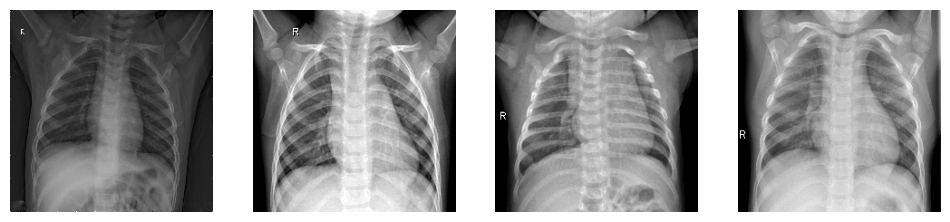

In [4]:
import os
import cv2
import matplotlib.pyplot as plt

# Define a function to load and preprocess images
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
        if img is not None:
            img = cv2.resize(img, (224, 224))  # Resize image to (224, 224) if needed
            images.append(img)
    return images

# Define the path to the directory containing images
image_folder = '/kaggle/input/chestxray/train/NORMAL'

# Load images from the specified folder
X = load_images_from_folder(image_folder)

# Display the first 4 images in a row
if X:
    plt.figure(figsize=(12, 3))
    for i in range(min(4, len(X))):  # Display up to 4 images or fewer if fewer are available
        plt.subplot(1, 4, i+1)
        plt.imshow(X[i], cmap='gray')
        plt.axis('off')
    plt.show()
else:
    print("No images loaded from the specified folder.")


In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

def load_images_from_folders(main_folder):
    """
    Load images from subfolders in the main folder and assign labels based on subfolder names.
    Returns a list of images and corresponding labels.
    """
    images = []
    labels = []

    subfolders = [subfolder for subfolder in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, subfolder))]

    for label, subfolder in enumerate(subfolders):  # Assign a numerical label to each subfolder
        subfolder_path = os.path.join(main_folder, subfolder)
        for filename in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
            if img is not None:
                img = cv2.resize(img, (224, 224))  # Resize image to (224, 224) if needed
                images.append(img)
                labels.append(label)  # Assign the label corresponding to the subfolder

    return np.array(images), np.array(labels)

# Define the path to the main folder containing subfolders (classes)
main_folder = '/kaggle/input/chestxray/train'

# Load images and corresponding labels from subfolders
X, y = load_images_from_folders(main_folder)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of images and labels in training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (4172, 224, 224)
Shape of X_test: (1044, 224, 224)
Shape of y_train: (4172,)
Shape of y_test: (1044,)


In [6]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)

In [7]:
from tensorflow.keras.applications import InceptionV3
img_rows, img_cols = 224, 224

inception = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(img_rows, img_cols, 3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
for layer in inception.layers:
    layer.trainable = False

In [12]:
num_classes = 2  # Replace 2 with the actual number of classes in your problem

# Import necessary layers
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

for (i, layer) in enumerate(inception.layers):
    print(str(i) + " " + layer.__class__.__name__, layer.trainable)

# Define your top model function outside the loop
def create_top_model(bottom_model, num_classes):
    """Creates the top or head of the model that will be placed on top of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dense(num_classes, activation='softmax')(top_model)
    return top_model

# Call the function to create the top model
top_model = create_top_model(inception, num_classes)

0 InputLayer False
1 Conv2D False
2 BatchNormalization False
3 Activation False
4 Conv2D False
5 BatchNormalization False
6 Activation False
7 Conv2D False
8 BatchNormalization False
9 Activation False
10 MaxPooling2D False
11 Conv2D False
12 BatchNormalization False
13 Activation False
14 Conv2D False
15 BatchNormalization False
16 Activation False
17 MaxPooling2D False
18 Conv2D False
19 BatchNormalization False
20 Activation False
21 Conv2D False
22 Conv2D False
23 BatchNormalization False
24 BatchNormalization False
25 Activation False
26 Activation False
27 AveragePooling2D False
28 Conv2D False
29 Conv2D False
30 Conv2D False
31 Conv2D False
32 BatchNormalization False
33 BatchNormalization False
34 BatchNormalization False
35 BatchNormalization False
36 Activation False
37 Activation False
38 Activation False
39 Activation False
40 Concatenate False
41 Conv2D False
42 BatchNormalization False
43 Activation False
44 Conv2D False
45 Conv2D False
46 BatchNormalization False
47 Batc

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model


num_classes = 2

FC_Head = create_top_model(inception, num_classes)

model = Model(inputs = inception.input, outputs = FC_Head)

print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 25,476,386 (97.18 MB)

 Trainable params: 3,673,602 (14.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

None


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
  3/131 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.7309 - loss: 2.9911  

I0000 00:00:1713166850.655452      90 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713166850.672266      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


131/131 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - accuracy: 0.7901 - loss: 0.7829
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9642 - loss: 0.1045
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9750 - loss: 0.0684
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9786 - loss: 0.0564
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9819 - loss: 0.0488
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9955 - loss: 0.0119
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 1.0000 - loss: 0.0030
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 1.0000 - loss: 6.4031e-04
Epoch 9/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 1.0000 - loss: 2.1788e-04
Epoch 10/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 1.0000 - loss: 6.3642e-05
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step
Confusion Matrix:
[[737  16]
 [ 14 277]]
True Negative (TN): 737
False Positive (FP): 1

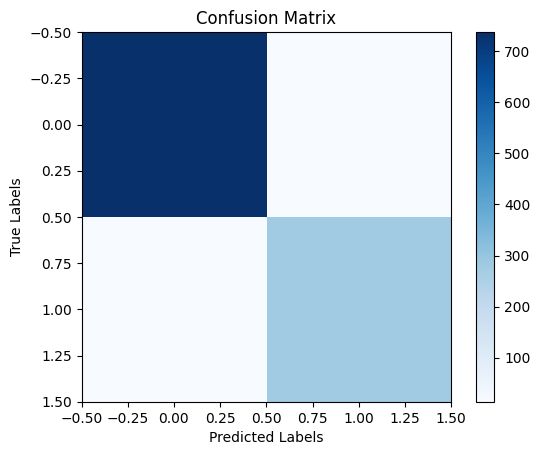

In [16]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Define the main directory containing subfolders for different classes
main_directory = '/kaggle/input/chestxray/train'  # Update with the path to your dataset directory

# List subdirectories (class folders) within the main directory
class_folders = [os.path.join(main_directory, d) for d in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, d))]

# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Initialize lists to store images and labels
images = []
labels = []

# Iterate through each class folder
for label, class_folder in enumerate(class_folders):
    # List image files in the class folder
    image_files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if f.endswith('.jpeg') or f.endswith('.jpg')]

    # Load and preprocess images
    for image_file in image_files:
        img = tf.keras.preprocessing.image.load_img(image_file, target_size=(img_height, img_width))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array /= 255.0  # Normalize pixel values to [0, 1]
        images.append(img_array)
        labels.append(label)  # Append class label (0 or 1)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split data into training and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define and train a simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size)

# Evaluate the model on the test set and compute the confusion matrix
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions (0 or 1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract values from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Print the confusion matrix and calculated metrics
print("Confusion Matrix:")
print(conf_matrix)
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

# Plot the confusion matrix
plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [17]:
# Calculate metrics
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = recall  # Same as recall

# Print the calculated metrics
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"True Positive (TP): {TP}")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")

Precision: 0.9454
Recall (Sensitivity): 0.9519
F1-score: 0.9486
Specificity: 0.9788
Accuracy: 0.9713
True Positive (TP): 277
True Negative (TN): 737
False Positive (FP): 16
False Negative (FN): 14
